## Домашнее задание<a class='anchor' id='hw'>

In [1]:
# Загрузка необходимых библиотек

import numpy as np

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

1. Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [2]:
# Загрузка данных

iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

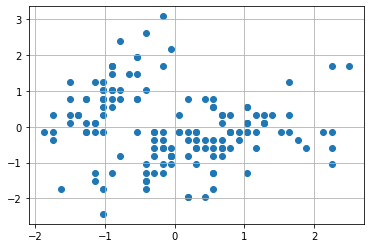

In [3]:
# Масштабирование выборки

X_ = X.astype(float)

rows, cols = X_.shape


def standard_scale(x):
    
    result = (x - x.mean(axis=0)) / x.std(axis=0)
    return result


X = standard_scale(X)

# График

plt.scatter(X[:, 0], X[:, 1])
plt.grid()

In [4]:
# Train, test

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.25, random_state = 42)

In [5]:
# K-Neighbours

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Доля правильных ответов без применения PCA на отложенной выборке: {accuracy_score(y_test, y_pred)}')

acc_before = accuracy_score(y_test, y_pred)

Доля правильных ответов без применения PCA на отложенной выборке: 1.0


In [6]:
# Собственные векторы и значения

# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# Сформируем список кортежей (собственное значение, вектор)

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# Отсортируем список по убыванию собственных значений

eig_pairs.sort(key = lambda x: x[0], reverse = True)

print('Собственные значения и собственные векторы в порядке убывания:')

for i in eig_pairs:
    
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979894, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021055, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.01353133569725, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929513, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [7]:
eig_sum = sum(eig_values)

var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.85076178670177, 3.668921889282877, 0.5178709107154922]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [8]:
# Вектор весов из собственных векторов (2 компоненты)

W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [9]:
# Новая матрица

Z = X.dot(W)

# Проверка результата

Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

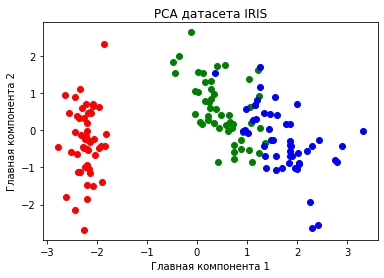

In [10]:
# Визуализация

plt.figure()
y = iris.target

for c, i in zip("rgb", [0, 1, 2]):
    
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c = c)
    
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [11]:
# Train, test для Z

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.25, random_state = 42)

# K-Neighbours

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
print(f'Доля правильных ответов после применения PCA на отложенной выборке: {accuracy_score(y_test, y_pred)}')

acc_after = accuracy_score(y_test, y_pred)

print(f'Результат изменился на {acc_before - acc_after}')

Доля правильных ответов после применения PCA на отложенной выборке: 0.9473684210526315
Результат изменился на 0.052631578947368474


**Вывод:** Результат незначительно ухудшился

---

2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [13]:
covariance_matrix

array([[150.        , -17.63546762, 130.76306638, 122.69116894],
       [-17.63546762, 150.        , -64.26601565, -54.91888988],
       [130.76306638, -64.26601565, 150.        , 144.42981471],
       [122.69116894, -54.91888988, 144.42981471, 150.        ]])

In [14]:
# Использование np.linalg

U_b, s_b, VT_b = np.linalg.svd(covariance_matrix)

print(f'Собственные значения:\n{s_b}')
print(f'Собственные векторы:\n{U_b}')

Собственные значения:
[437.77467248 137.10457072  22.01353134   3.10722546]
Собственные векторы:
[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [15]:
# Матрица

W = np.hstack((U_b.T[0].reshape(4,1), U_b.T[1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.52106591 -0.37741762]
 [ 0.26934744 -0.92329566]
 [-0.5804131  -0.02449161]
 [-0.56485654 -0.06694199]]
